In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('superstore.csv', encoding='latin-1')

print(df.head())
print(df.info())
print(df.isnull().sum())

   Row ID        Order ID  Order Date  ... Quantity Discount    Profit
0       1  CA-2016-152156   11/8/2016  ...        2     0.00   41.9136
1       2  CA-2016-152156   11/8/2016  ...        3     0.00  219.5820
2       3  CA-2016-138688   6/12/2016  ...        2     0.00    6.8714
3       4  US-2015-108966  10/11/2015  ...        5     0.45 -383.0310
4       5  US-2015-108966  10/11/2015  ...        2     0.20    2.5164

[5 rows x 21 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8  

# **1. Produk apa yang paling menguntungkan?**

In [56]:
profit_per_produk = df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False)
print(profit_per_produk)

Sub-Category
Copiers        55617.8249
Phones         44515.7306
Accessories    41936.6357
Paper          34053.5693
Binders        30221.7633
Chairs         26590.1663
Storage        21278.8264
Appliances     18138.0054
Furnishings    13059.1436
Envelopes       6964.1767
Art             6527.7870
Labels          5546.2540
Machines        3384.7569
Fasteners        949.5182
Supplies       -1189.0995
Bookcases      -3472.5560
Tables        -17725.4811
Name: Profit, dtype: float64


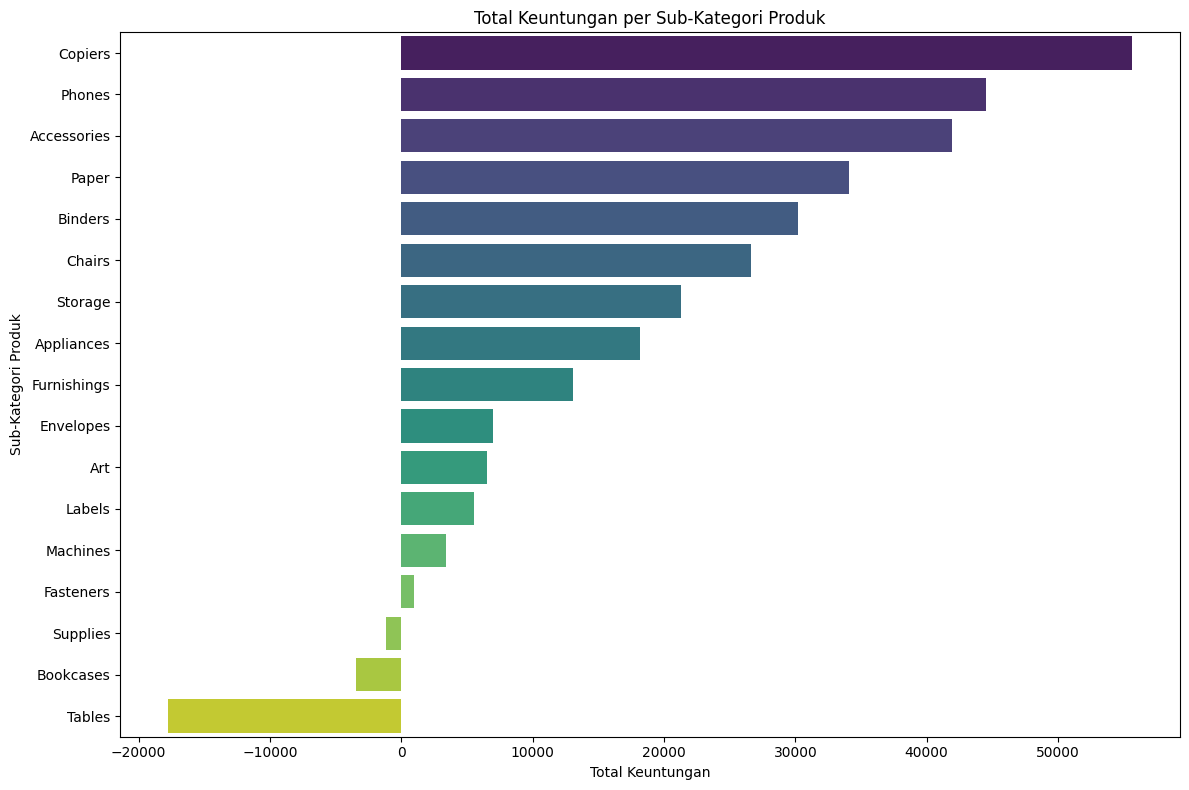

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12, 8))
sns.barplot(x=profit_per_produk.values, y=profit_per_produk.index, palette="viridis", orient='h')
plt.xlabel("Total Keuntungan")
plt.ylabel("Sub-Kategori Produk")
plt.title("Total Keuntungan per Sub-Kategori Produk")
plt.tight_layout()
plt.show()

# **2. Kategori produk apa yang paling banyak terjual?**

In [69]:
produk_terlaris = df.groupby('Sub-Category')['Quantity'].sum().sort_values(ascending=False)
print(produk_terlaris)

Sub-Category
Binders        5974
Paper          5178
Furnishings    3563
Phones         3289
Storage        3158
Art            3000
Accessories    2976
Chairs         2356
Appliances     1729
Labels         1400
Tables         1241
Fasteners       914
Envelopes       906
Bookcases       868
Supplies        647
Machines        440
Copiers         234
Name: Quantity, dtype: int64


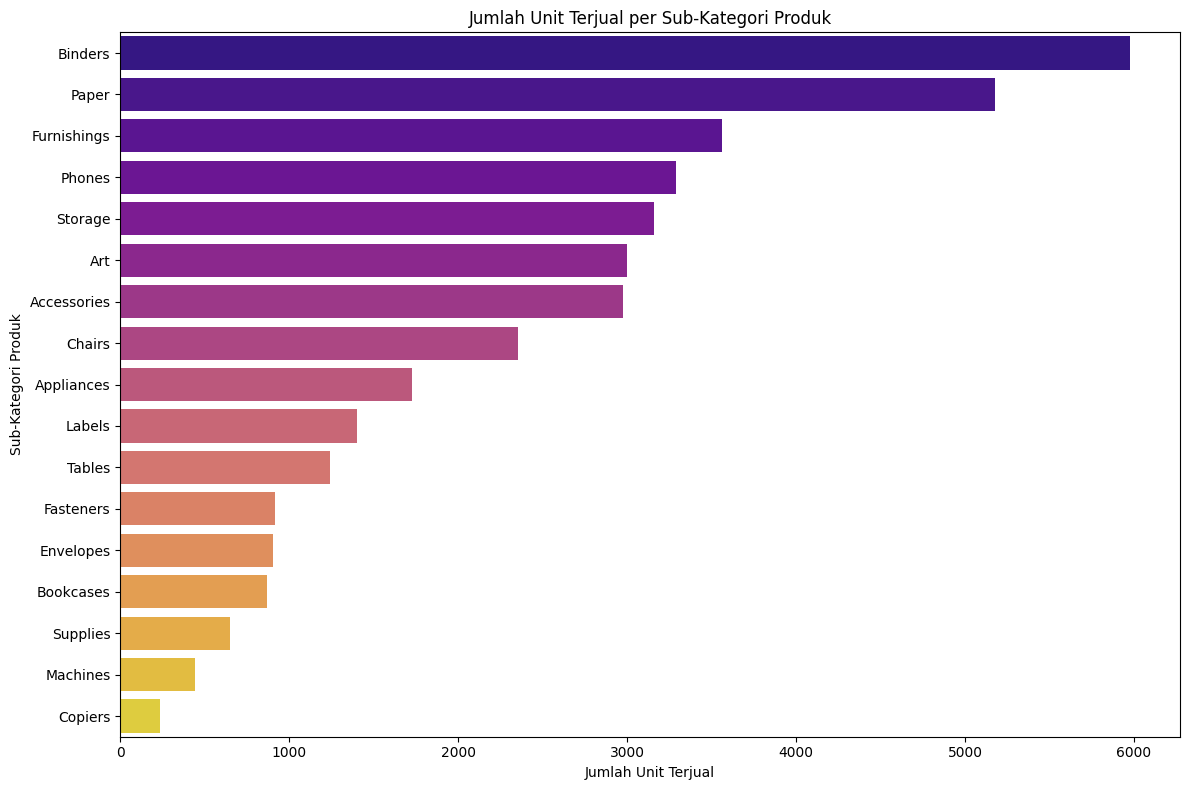

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.barplot(x=produk_terlaris.values, y=produk_terlaris.index, palette="plasma", orient='h')
plt.xlabel("Jumlah Unit Terjual")
plt.ylabel("Sub-Kategori Produk")
plt.title("Jumlah Unit Terjual per Sub-Kategori Produk")
plt.tight_layout()
plt.show()

# **3. Kota mana yang memiliki penjualan tertinggi?**

In [74]:
penjualan_kota_tertinggi = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(10)
print(penjualan_kota_tertinggi)

City
New York City    256368.1610
Los Angeles      175851.3410
Seattle          119540.7420
San Francisco    112669.0920
Philadelphia     109077.0130
Houston           64504.7604
Chicago           48539.5410
San Diego         47521.0290
Jacksonville      44713.1830
Springfield       43054.3420
Name: Sales, dtype: float64


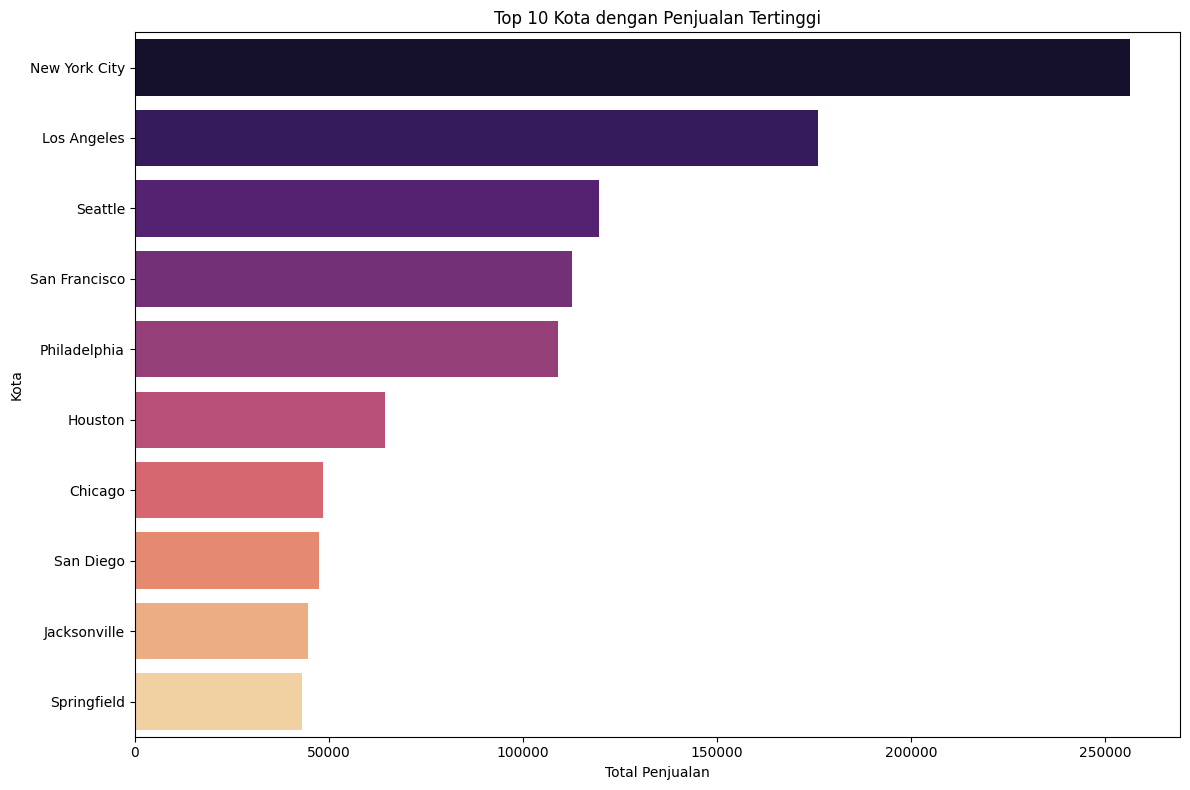

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

top_10_kota = penjualan_kota_tertinggi.head(10)
plt.figure(figsize=(12, 8))

sns.barplot(x=top_10_kota.values, y=top_10_kota.index, palette="magma", orient='h')

plt.xlabel("Total Penjualan")
plt.ylabel("Kota")
plt.title("Top 10 Kota dengan Penjualan Tertinggi")
plt.tight_layout()
plt.show()

# **4. Bagaimana tren penjualan dari waktu ke waktu?**

In [50]:
tren_penjualan = df.groupby('Order Date')['Sales'].sum()
tren_penjualan = df['Sales'].resample('M').sum()
print(tren_penjualan.to_string())

Order Date
2014-01-31     14236.8950
2014-02-28      4519.8920
2014-03-31     55691.0090
2014-04-30     28295.3450
2014-05-31     23648.2870
2014-06-30     34595.1276
2014-07-31     33946.3930
2014-08-31     27909.4685
2014-09-30     81777.3508
2014-10-31     31453.3930
2014-11-30     78628.7167
2014-12-31     69545.6205
2015-01-31     18174.0756
2015-02-28     11951.4110
2015-03-31     38726.2520
2015-04-30     34195.2085
2015-05-31     30131.6865
2015-06-30     24797.2920
2015-07-31     28765.3250
2015-08-31     36898.3322
2015-09-30     64595.9180
2015-10-31     31404.9235
2015-11-30     75972.5635
2015-12-31     74919.5212
2016-01-31     18542.4910
2016-02-29     22978.8150
2016-03-31     51715.8750
2016-04-30     38750.0390
2016-05-31     56987.7280
2016-06-30     40344.5340
2016-07-31     39261.9630
2016-08-31     31115.3743
2016-09-30     73410.0249
2016-10-31     59687.7450
2016-11-30     79411.9658
2016-12-31     96999.0430
2017-01-31     43971.3740
2017-02-28     20301.1334
2

/tmp/ipython-input-50-3154132587.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  tren_penjualan = df['Sales'].resample('M').sum()


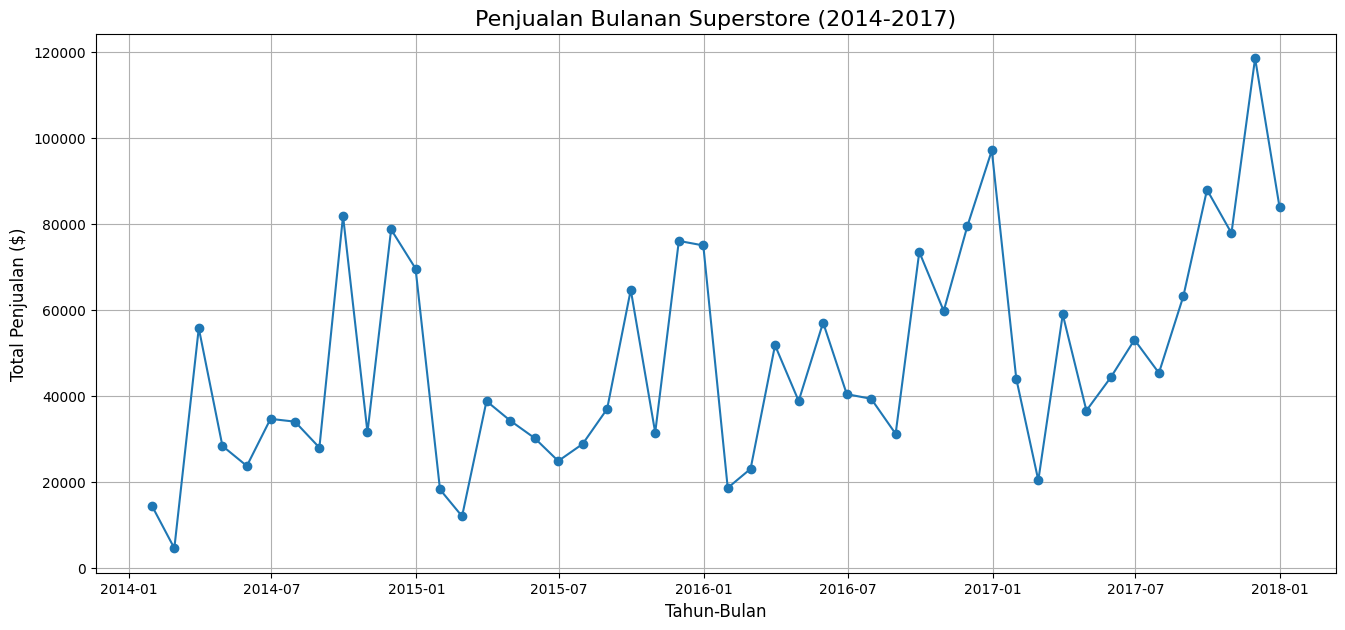

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 7))

plt.plot(tren_penjualan.index, tren_penjualan.values, marker='o', linestyle='-')

plt.title('Penjualan Bulanan Superstore (2014-2017)', fontsize=16)
plt.xlabel('Tahun-Bulan', fontsize=12)
plt.ylabel('Total Penjualan ($)', fontsize=12)

plt.grid()

# Menampilkan grafik
plt.show()